# Project: Investigate a Dataset (TMDb Movie Dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
>**TMDb movie data**:
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

## Questions we will try to answer
- First question we will try to answer is: What was the most popular genres for every single year from 1960 to 2015 and my approach to answer this question will be to find the most popular movie then find its genres. 
 
- Second question will be : What kinds of properties are associated with movies that have high revenues? and we will be looking at only two properties in this analysis movies budgets and the release date of the movies.

In [1]:
# Importing The Packages That Will Be Used To Do The Analysis With.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies_df = pd.read_csv('tmdb-movies.csv') # Making a new dataframe for the dateset.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# A quick look at the first few rows of the dataset.
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movies_df.shape

(10866, 21)

There is 10866 rows and 21 column in the dataset.

In [4]:
movies_df.columns # Columns names of the dataset.

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
movies_df.describe() # A general look at the summary statistics of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Looking for duplicates.
movies_df.duplicated().sum()

1

In [7]:
# Here is that one duplicated row.
movies_df[movies_df.duplicated(keep=False)]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Making a new Dataframe and Droping The duplicates from it
new_df = movies_df.copy()
new_df.drop_duplicates(inplace=True)


In [9]:
# Making sure the duplicates are dropped.
print('There is {} duplicates in the dataframe.'.format(new_df.duplicated().sum()))

There is 0 duplicates in the dataframe.


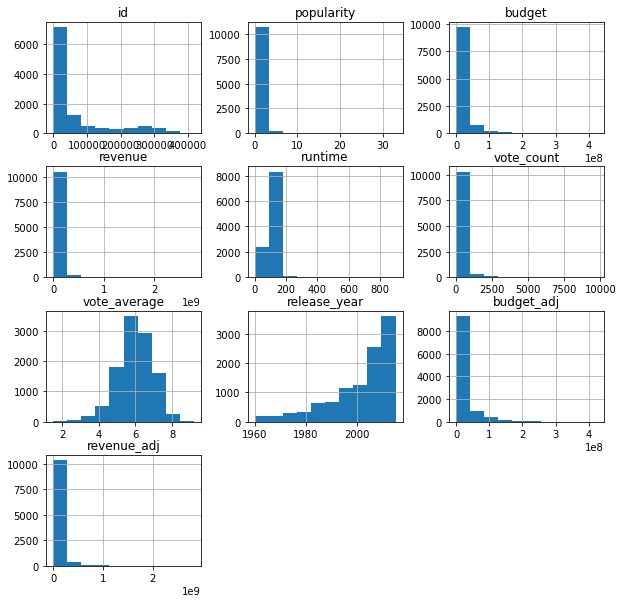

In [10]:
# Taking general look at the dataframe histogram. 
new_df.hist(figsize=(10,10));

Later to address our main questions we will be selecting only few columns that we think will be useful for us and drop the other columns.

In [11]:
# General look at the dataset info.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

> Here we notice that genres column have some null entries, budget_adj and revenue_adj columns datatypes are floats and release_date is object so those columns need to be fixed later in the cleaning stage.

### Data Cleaning

>**Next Three Steps**

- First: to make a new dataframe that only contains the columns that we think will be useful in our analysis and it will be like this [ popularity, budget, revenue, original_title, runtime, genres, release_date, release_year, budget_adj, revenue_adj ]

> 
- Second: is to make two new dataframes to answer each question from our questions.

>
- Third: is to take a closer look at the data in the new dataframes to make sure everything is good and if not then we will try to fix it.


> **First Step.**
- Make a new dataframe.

In [12]:
# Making our new smaller dataframe.
new_df = new_df[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'release_year', 'budget_adj', 'revenue_adj']]

In [13]:
# First few rows of our new dataframe.
new_df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [14]:
# Changing budget_adj and revenue_adj datatypes to int64
new_df['budget_adj'] = new_df['budget_adj'].astype('int64')
new_df['revenue_adj'] = new_df['revenue_adj'].astype('int64')

In [15]:
# Making sure the datatypes of the columns above changed correctly
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   release_year    10865 non-null  int64  
 8   budget_adj      10865 non-null  int64  
 9   revenue_adj     10865 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 933.7+ KB


> **Second Step.**
- Make two new dataframes to answer each question

In [16]:
# Now we will make two seperete different dataframes to help us answer our two questions.

Top_genre_byyear_df = new_df.copy() # This one for most popular genre by year.
Top_genre_byyear_df = Top_genre_byyear_df[['release_year', 'genres', 'popularity', 'original_title']]

# And this dataframe is for What kinds of properties are associated with movies that have high revenues
high_rev_prop_df = new_df.copy() 
high_rev_prop_df = high_rev_prop_df[['revenue_adj', 'budget_adj', 'genres', 'release_date', 'runtime', 'original_title']] 


> **Third Step.**
- Now we will take a closer look and clean each dataframe one at a time
  - First we will start with the Top_genre_byyear_df dataframe.

In [17]:
# Taking a general look.
Top_genre_byyear_df

,release_year,genres,popularity,original_title
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Jurassic World
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936,Mad Max: Fury Road
2,2015,Adventure|Science Fiction|Thriller,13.112507,Insurgent
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,Star Wars: The Force Awakens
4,2015,Action|Crime|Thriller,9.335014,Furious 7
...,...,...,...,...
10861,1966,Documentary,0.080598,The Endless Summer
10862,1966,Action|Adventure|Drama,0.065543,Grand Prix
10863,1966,Mystery|Comedy,0.065141,Beregis Avtomobilya
10864,1966,Action|Comedy,0.064317,"What's Up, Tiger Lily?"


In [18]:
Top_genre_byyear_df.describe()

,release_year,popularity
count,10865.000000,10865.000000
mean,2001.321859,0.646446
std,12.813260,1.000231
min,1960.000000,0.000065
25%,1995.000000,0.207575
50%,2006.000000,0.383831
75%,2011.000000,0.713857
max,2015.000000,32.985763


In [19]:
Top_genre_byyear_df.isnull().sum()

release_year       0
genres            23
popularity         0
original_title     0
dtype: int64

Notice that genres column have 23 null entries and all other columns have no nulls.

In [20]:
# Making a query to take a look at the rows that have null values in genres column.
null_genres = Top_genre_byyear_df.query('genres != genres')
null_genres

,release_year,genres,popularity,original_title
424,2015,NaN,0.244648,Belli di papÃ
620,2015,NaN,0.129696,All Hallows' Eve 2
997,2014,NaN,0.330431,Star Wars Rebels: Spark of Rebellion
1712,2009,NaN,0.302095,Prayers for Bobby
1897,2009,NaN,0.020701,Jonas Brothers: The Concert Experience
2370,2010,NaN,0.081892,Freshman Father
2376,2010,NaN,0.068411,Doctor Who: A Christmas Carol
2853,2001,NaN,0.130018,Vizontele
3279,2008,NaN,0.145331,ì•„ê¸°ì™€ ë‚˜
4547,2012,NaN,0.520520,London 2012 Olympic Opening Ceremony: Isles of...


From looking at the data above and comparing the movies popularity to Top_genre_byyear_df dataframe mean popularity we could see that the 23 null rows in genres column are below the mean popularity of the dataframe so it will not effect most popular genres very much since we are focusing high popularity genres, so we could actually delete them or leave them as they are later.

In [21]:
# Here we will be checking if release_year column have 0 values.
zero_year = Top_genre_byyear_df.query('release_year == 0')
print('There is {} entries that contains only zeros in release_year column.'.format(zero_year['release_year'].value_counts().sum()))

There is 0 entries that contains only zeros in release_year column.


In [22]:
# So our cleaned dataframe that we will be working on for the most popular genres by year question will be this one.
Top_genre_byyear_df

,release_year,genres,popularity,original_title
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763,Jurassic World
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936,Mad Max: Fury Road
2,2015,Adventure|Science Fiction|Thriller,13.112507,Insurgent
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,Star Wars: The Force Awakens
4,2015,Action|Crime|Thriller,9.335014,Furious 7
...,...,...,...,...
10861,1966,Documentary,0.080598,The Endless Summer
10862,1966,Action|Adventure|Drama,0.065543,Grand Prix
10863,1966,Mystery|Comedy,0.065141,Beregis Avtomobilya
10864,1966,Action|Comedy,0.064317,"What's Up, Tiger Lily?"


> **Third Step.** Second part.
  - We will work with the high_rev_prop_df dataframe.

In [23]:
# Taking a general look.
high_rev_prop_df

,revenue_adj,budget_adj,genres,release_date,runtime,original_title
0,1392445892,137999939,Action|Adventure|Science Fiction|Thriller,6/9/15,124,Jurassic World
1,348161292,137999939,Action|Adventure|Science Fiction|Thriller,5/13/15,120,Mad Max: Fury Road
2,271619025,101199955,Adventure|Science Fiction|Thriller,3/18/15,119,Insurgent
3,1902723129,183999919,Action|Adventure|Science Fiction|Fantasy,12/15/15,136,Star Wars: The Force Awakens
4,1385748801,174799923,Action|Crime|Thriller,4/1/15,137,Furious 7
...,...,...,...,...,...,...
10861,0,0,Documentary,6/15/66,95,The Endless Summer
10862,0,0,Action|Adventure|Drama,12/21/66,176,Grand Prix
10863,0,0,Mystery|Comedy,1/1/66,94,Beregis Avtomobilya
10864,0,0,Action|Comedy,11/2/66,80,"What's Up, Tiger Lily?"


- Looking at the data above we notice that there is several rows when revenue_adj and budget_adj equal 0 so we will see if we need to fix that later.

In [24]:
high_rev_prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   revenue_adj     10865 non-null  int64 
 1   budget_adj      10865 non-null  int64 
 2   genres          10842 non-null  object
 3   release_date    10865 non-null  object
 4   runtime         10865 non-null  int64 
 5   original_title  10865 non-null  object
dtypes: int64(3), object(3)
memory usage: 594.2+ KB


> We will take a look on the rows where genres column have null values.

In [25]:
high_rev_prop_df.query('genres != genres')

,revenue_adj,budget_adj,genres,release_date,runtime,original_title
424,0,0,NaN,10/29/15,100,Belli di papÃ
620,0,0,NaN,10/6/15,90,All Hallows' Eve 2
997,0,0,NaN,10/3/14,44,Star Wars Rebels: Spark of Rebellion
1712,0,0,NaN,2/27/09,88,Prayers for Bobby
1897,0,0,NaN,2/27/09,76,Jonas Brothers: The Concert Experience
2370,0,0,NaN,6/5/10,0,Freshman Father
2376,0,0,NaN,12/25/10,62,Doctor Who: A Christmas Carol
2853,0,0,NaN,2/2/01,110,Vizontele
3279,0,0,NaN,8/13/08,96,ì•„ê¸°ì™€ ë‚˜
4547,0,0,NaN,7/27/12,220,London 2012 Olympic Opening Ceremony: Isles of...


- So it appears that every row with a null value in genres column have a 0 value in revenue_adj column, since we are going to only look at properties of movies with high revenues only we will not need those null values rows because those rows have mostly 0 values in revenue_adj and budget_adj columns.

In [26]:
# Making a query to check how many rows revenue_adj and budget_adj have values of 0.
print('there is {} rows in revenue_adj and budget_adj columns when those columns values equal 0'.format(len(high_rev_prop_df.query('revenue_adj == 0 or budget_adj == 0'))))

there is 7012 rows in revenue_adj and budget_adj columns when those columns values equal 0


# So now our two dataframes that we will be working with are
- Top_genre_byyear_df

- high_rev_prop_df

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What was the genres for the most popular movie for every year from 1960 to 2015?!)

In [27]:
genres_list = [] # An empty list to append every most popular genres by a single year.

year = 1960 # A variable that holds the oldest/minimum year in the release_year column. 

for x in Top_genre_byyear_df['release_year']: # A For loop that will iterate over the column release_year in the Top_genre_byyear_df dataframe.
    if year == 1960 or year < 2016: # If release_year is between 1960/min_year and 2015/max_year the next loop will get working. 
    
    
    # Making a query for the row that columns release_year will = The year variable.
        qur1 = Top_genre_byyear_df.query('release_year == {}'.format(year)) 
        max_pplr = qur1['popularity'].max() # Finding The maximum value in the popularity column in the query above in (qur1).
        
        # Making a query to find the row that popularity column value will = the value we got above in (max_pplr)
        # and that will give us the most popular genre in a year as dataframe with a single row.
        qur3 = Top_genre_byyear_df.query('popularity == {}'.format(max_pplr)) 
        genres_list.append(qur3)# Appending that dataframe with a single row in the df_new empty list.
        
        # This will increment the year variable with 1 
        #untill the If statment condition is met which will be the year variable reaching 2016.
        year = year + 1 
    else:
        break
# Making a new variable to hold all dataframes in the genres_list list Concatenated together in a single dataframe.
Final_top_genre_byyear_df = pd.concat(genres_list,ignore_index=True) 

print('If this list is too long for you, use the function in the next cell to check a single year at a time')

# So This will be our final dataframe that only contains the most popular movie/genres from 1960 to 2015
Final_top_genre_byyear_df 

If this list is too long for you, use the function in the next cell to check a single year at a time


,release_year,genres,popularity,original_title
0,1960,Drama|Horror|Thriller,2.610362,Psycho
1,1961,Adventure|Animation|Comedy|Family,2.631987,One Hundred and One Dalmatians
2,1962,Adventure|Action|Thriller,3.170651,Dr. No
3,1963,Action|Thriller|Adventure,2.508235,From Russia With Love
4,1964,Adventure|Action|Thriller,3.153791,Goldfinger
5,1965,Adventure|Action|Thriller,1.910465,Thunderball
6,1966,Animation|Family|Comedy,1.227582,How the Grinch Stole Christmas!
7,1967,Family|Animation|Adventure,2.550704,The Jungle Book
8,1968,Science Fiction|Mystery|Adventure,3.309196,2001: A Space Odyssey
9,1969,Adventure|Action|Thriller,1.778746,On Her Majesty's Secret Service


- From looking at the findings above it appears that most frequent genres were Adventure, Action and Science Fiction.

In [ ]:
# Run this cell to use the function and enter a year between 1960-2015 to see most popular genres for that year.
pk_year = input("Chose a year between 1960-2015 : ") # An input function that will take your the year your year input and use it in the main function.

def year_function(i):
    """Return the row for which year you will input in the pk_year input function above by using the Final_top_genre_byyear_df
    """
    
    year_function = Final_top_genre_byyear_df.query('release_year == {}'.format(i))
    return year_function


year_function(pk_year)

### Research Question 2  (Looking at the properties for high revenue movies!)

> We will look at two properties and see if there is a relation betwen them and the revenue that a movie generates.
- First one is the budgets of movies.(Note: that the budget_adj is adjusted for 2010 USD ) and we will consider only movies that exceeds $10M in revenues are hight revenue movies.

In [28]:
# Making a new Dataframe for only revenue_adj and budget_adj columns where revenue_adj is >= $10,000,000.
bdgt_revn_df = high_rev_prop_df.copy()
bdgt_revn_df = bdgt_revn_df[['revenue_adj', 'budget_adj']]
bdgt_revn_df = bdgt_revn_df.query('revenue_adj >= 10000000')

In [29]:
# Count of rows and columns.
bdgt_revn_df.shape

(3658, 2)

- Only 3658 rows includes movies that earned more than or equal to $10M.

In [30]:
# Summary statistics.
bdgt_revn_df['budget_adj'].describe().round()

count         3658.0
mean      44334702.0
std       46268955.0
min              0.0
25%       11942327.0
50%       30598650.0
75%       62160970.0
max      425000000.0
Name: budget_adj, dtype: float64

In [31]:
# Median budget for movies with >= $10M in revenues.
print('Median budget for movies with >= $10M in revenues is: ${}'.format(bdgt_revn_df['budget_adj'].median()))


Median budget for movies with >= $10M in revenues is: $30598650.0


In [32]:
# The average budget for movies with >= $10M in revenues.
print('The average budget for movies with >= $10M in revenues is: ${}'.format(bdgt_revn_df['budget_adj'].mean()))


The average budget for movies with >= $10M in revenues is: $44334701.984417714


In [33]:
# looking at the 25th percentile of movies budget and revenues.
bdgt_revn_df['budget_adj'].quantile(.25), bdgt_revn_df['revenue_adj'].quantile(.25)

(11942327.0, 33007074.25)

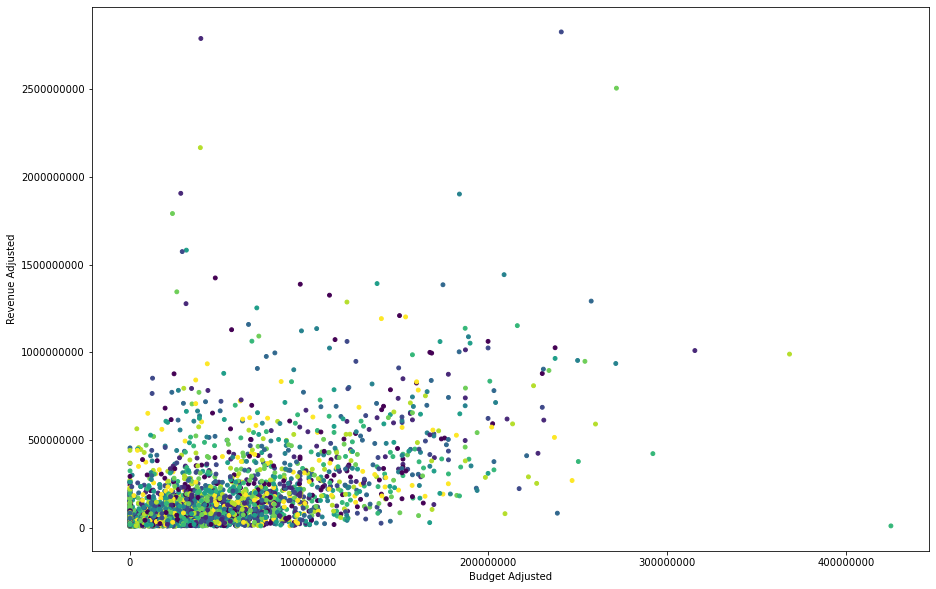

In [34]:
# Here we will make a scatter plot and look for the relation between the revenue and the budget.
c =  np.random.randint(0, 10, 3658)

plt.figure(figsize=(15,10))
plt.xlabel('Budget Adjusted')
plt.ylabel('Revenue Adjusted')
plt.scatter('budget_adj', 'revenue_adj', data= bdgt_revn_df, c=c, s=15  )
plt.ticklabel_format(useOffset=False, style='plain')

plt.show();

- From the 25th percentile measurment and the visualisation above we now know that 75 percent of those movies had a budget of more than 11,942,327 USD/11 Million USD and 75 percent genreted more than 33,007,074 USD/ 33 Million USD in revenues.

> Second step we will take a look at if there is a relation between movies release date/month and the revenues it generates.

In [35]:
# Making a new dataframe with only revenue_adj and release_date columns.
date_revn_df = high_rev_prop_df.copy()
date_revn_df = date_revn_df[['revenue_adj', 'release_date']]
date_revn_df = date_revn_df.query('revenue_adj >= 10000000')
date_revn_df

,revenue_adj,release_date
0,1392445892,6/9/15
1,348161292,5/13/15
2,271619025,3/18/15
3,1902723129,12/15/15
4,1385748801,4/1/15
...,...,...
10822,226643572,6/21/66
10828,87334190,7/13/66
10829,40308088,12/17/66
10835,134360293,12/20/66


In [36]:
# We will first change release_date datatype to datetime Year-Month-Day.
date_revn_df['release_date'] = pd.to_datetime(date_revn_df['release_date'], format='%x')
date_revn_df.loc[date_revn_df['release_date'].dt.year > 2015, 'release_date'] -= pd.DateOffset(years=100)
date_revn_df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   1966-06-21
10828   1966-07-13
10829   1966-12-17
10835   1966-12-20
10848   1966-08-24
Name: release_date, Length: 3658, dtype: datetime64[ns]

In [37]:
# A new dataframe that contains only the number of a month from the release_date column.
month_df = date_revn_df.copy()
month_df['release_date'] = pd.DatetimeIndex(month_df['release_date']).month # thanks to python by Ahh the negotiatior 
month_df.rename(columns={'release_date': 'release_month'}, inplace=True) # Renaming release_date column to release_month.
month_df.head()

,revenue_adj,release_month
0,1392445892,6
1,348161292,5
2,271619025,3
3,1902723129,12
4,1385748801,4


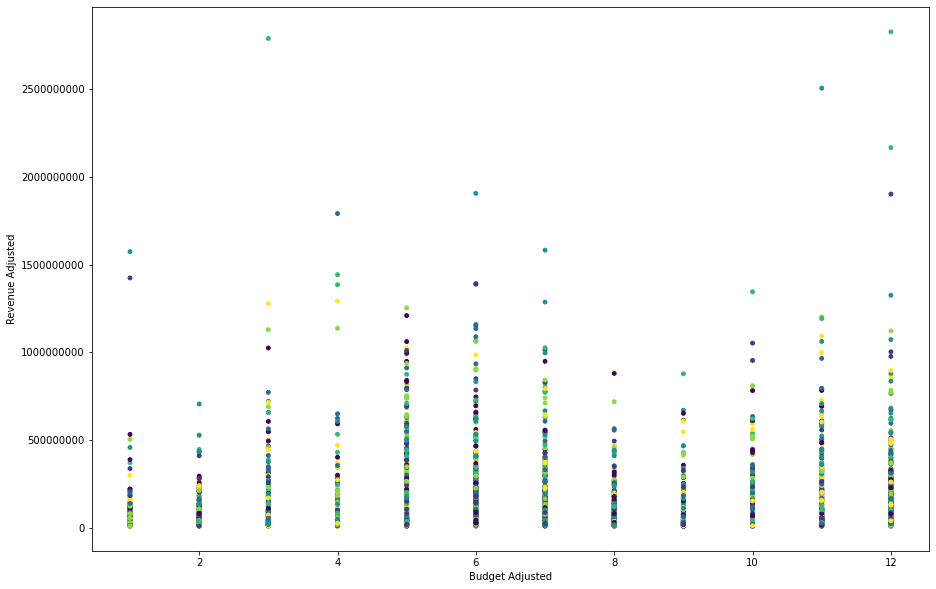

In [38]:
c =  np.random.randint(0, 7, 3658)

plt.figure(figsize=(15,10))
plt.xlabel('Budget Adjusted')
plt.ylabel('Revenue Adjusted')
plt.scatter('release_month', 'revenue_adj', data= month_df, c=c, s=15  )
plt.ticklabel_format(useOffset=False, style='plain')

plt.show();

- So it appears that most movies in the list of movies that made more than or equal to $10M were in December and June and the highest revenue movies in that list were in December.

In [39]:
# Here we will take a look to confirm that the most frequent month in the plot above was December/the 12 month.
month_df['release_month'].mode()[0]

12

In [40]:
# Making a query to see how frequent is the month '12' .
december_freq = len(month_df.query('release_month == 12'))
december_freq

426

- Since there is 3658 rows we will calculate the percentage of the month '12' from that number.

In [41]:
print('{}% of the movies were released in the month December'.format((december_freq/month_df.count()[0]*100).round(2)))

11.65% of the movies were released in the month December


In [42]:
# Sorting the dataframe by the top 10 revenues genereted to look at the most frequent month in it.
month_df.sort_values(by='revenue_adj', ascending = False).head(10)

,revenue_adj,release_month
1386,2827123750,12
1329,2789712242,3
5231,2506405735,11
10594,2167324901,12
9806,1907005841,6
3,1902723129,12
8889,1791694309,4
8094,1583049536,7
10110,1574814739,1
4361,1443191435,4


<a id='conclusions'></a>
## Conclusions

> Movies with Adventure, Action and Science Fiction genres were more frequent in most popluar genres by year from 1960-2015.

> The median budget for movies with more than or equal to 10 million USD in revenues was 30,598,650 USD/+30M USD

> 75 percent of movies that genreted more than or equal to 10Million USD had a budget of more than 11,942,327 USD/11 Million USD and 75 percent of the same movies genreted more than 33,007,074 USD/ 33 Million USD in revenues. 

> 11.65% of the movies that made more than or equal to 10 million USD were released in December, and 3 of the top 10 earning movies were also released in December.

### Limitations
- The columns revenues_adj and budget_adj had 7012 rows out of the 10866 with 0 values and that number is very big that there is a chance it could've skewed the analysis to any other direction if there were actual true numbers for those entries so an advice would be to try and get the check the real numbers for those entries with 0 values.


## References
- Stackoverflow was very helpful for most of the problem i faced while coding.
- pandas and matplotlib documentry.
- learned this (pd.DatetimeIndex) code from  https://www.codegrepper.com/code-examples/python/how+to+select+data+for+one+month+in+pandas